# 6 key steps

### 1. Install and import dependencies
### 2. Load model
### 3. Make Detections
### 4. Real time detections
### 5. Train from scratch
### 6. Load Model

## Cloning yolo V5

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

In [2]:
# install dependencies and requirements


In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
# download the pre trained model from pytorch hub - YOLOv5 | PyTorch # Load model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-22 Python-3.8.2 torch-1.12.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [6]:
# Check on the cocoa classes that we are going to use for this project


## Make Detections

In [7]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [8]:
results = model(img)
print(results)

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1266.0ms pre-process, 469.7ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)



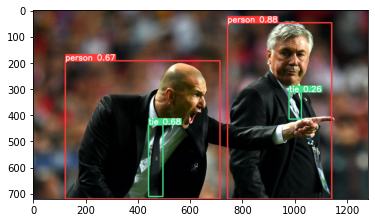

In [9]:
# rendering
%matplotlib inline
plt.imshow(np.squeeze(results.render())) # rebdering allows us to classify parts of images
plt.show() # show the different classes as per the classes in the yolov5

In [10]:
results.xyxy # gives the different co-ordinates for our particular model

[tensor([[7.43290e+02, 4.83437e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

In [11]:
np.array(results.render()).shape

(1, 720, 1280, 3)

## Real time Detections to access the webcam


In [14]:
import cv2

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    results = model(frame)
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()